In [10]:
# train_cnn.ipynb

In [11]:
# Imports

# Needed for grabbing local python files
import sys
import os

# ML library for creating models and training
import torch
import torch.optim as optim
import torch.nn as nn

# Used to iterate over a dataset
from torch.utils.data import random_split, DataLoader

# Show data
import matplotlib.pyplot as plt

In [12]:
# Grab local imports
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(os.path.join(project_root, "src"))

from data.load_data import get_train_dataset
from models.cnn import CNN

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [13]:
# Define split sizes
train_dataset = get_train_dataset()
dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)

train_size = int(0.8 * len(dataloader.dataset))  # 80% train
test_size = len(dataloader.dataset) - train_size  # 20% test

# Split dataset
train_dataset, test_dataset = random_split(dataloader.dataset, [train_size, test_size])

# Create new dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=dataloader.batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=dataloader.batch_size, shuffle=False)

In [14]:
# Initialize model
cnn_model = CNN().to(device)

In [15]:
def train_and_evaluate(model, train_dataloader, test_dataloader, epochs=10, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    criterion = nn.SmoothL1Loss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_loss_history = []
    test_loss_history = []

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0

        for images, labels in train_dataloader:
            images, labels = images.to(device), labels.to(device).float()

            optimizer.zero_grad()
            outputs = model(images).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_dataloader)
        train_loss_history.append(avg_train_loss)

        # Evaluate on test data
        model.eval()
        total_test_loss = 0

        with torch.no_grad():
            for images, labels in test_dataloader:
                images, labels = images.to(device), labels.to(device).float()
                outputs = model(images).squeeze()
                loss = criterion(outputs, labels)
                total_test_loss += loss.item()

        avg_test_loss = total_test_loss / len(test_dataloader)
        test_loss_history.append(avg_test_loss)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}")

    # Plot Learning Curve
    plt.plot(range(1, epochs+1), train_loss_history, label="Train Loss", marker='o')
    plt.plot(range(1, epochs+1), test_loss_history, label="Test Loss", marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Learning Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch 1/10, Train Loss: 1.2481, Test Loss: 1.1504
Epoch 2/10, Train Loss: 1.1158, Test Loss: 1.0196
Epoch 3/10, Train Loss: 1.0780, Test Loss: 1.0348
Epoch 4/10, Train Loss: 1.0596, Test Loss: 1.0123
Epoch 5/10, Train Loss: 1.0377, Test Loss: 0.9779
Epoch 6/10, Train Loss: 1.0007, Test Loss: 1.0131
Epoch 7/10, Train Loss: 0.9381, Test Loss: 1.0831
Epoch 8/10, Train Loss: 0.8611, Test Loss: 1.1359
Epoch 9/10, Train Loss: 0.7662, Test Loss: 1.0150
Epoch 10/10, Train Loss: 0.6408, Test Loss: 1.0181


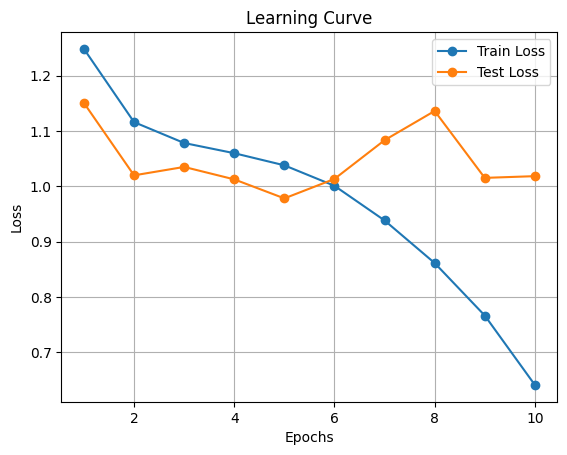

In [16]:
train_and_evaluate(cnn_model, train_dataloader, test_dataloader, epochs=10)